In [1]:
import csv
from sklearn import linear_model
import numpy
import matplotlib.pyplot as plt
from collections import Counter
from collections import defaultdict
from datetime import datetime
import math
import tensorflow as tf
import string
from nltk.stem.porter import *
from gensim.models import Word2Vec
import statistics

In [2]:
dataset = []
with open('../assignment2data/archive/RAW_interactions.csv', 'r') as file:
    reader = csv.DictReader(file)
    for line in reader:
        dataset.append(line)
print(len(dataset))

1132367


In [3]:
dataset[0]

{'user_id': '38094',
 'recipe_id': '40893',
 'date': '2003-02-17',
 'rating': '4',
 'review': 'Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt.  Used low fat sour cream.  Thanks.'}

In [4]:
recipeToDataset = {}
for r in dataset:
    recipeToDataset[r['recipe_id']] = r

In [5]:
#Part 1

In [6]:
ratings = [int(d['rating']) for d in dataset]
len(ratings)
rating_counts = Counter(ratings)
uniqueRatings = list(rating_counts.keys())
counts = list(rating_counts.values())
rating_counts
count = 0
for rating in ratings:
    count += rating
print("Average Rating of Recipes: ")
print(count/len(ratings))


Average Rating of Recipes: 
4.411016039852804


In [7]:
totalRatings = sum(counts)
percentages = [count / totalRatings * 100 for count in counts]
percentages

[16.545872495401227,
 72.09358803285507,
 5.373434584370615,
 1.2472104891788616,
 3.6079292314240874,
 1.1319651667701371]

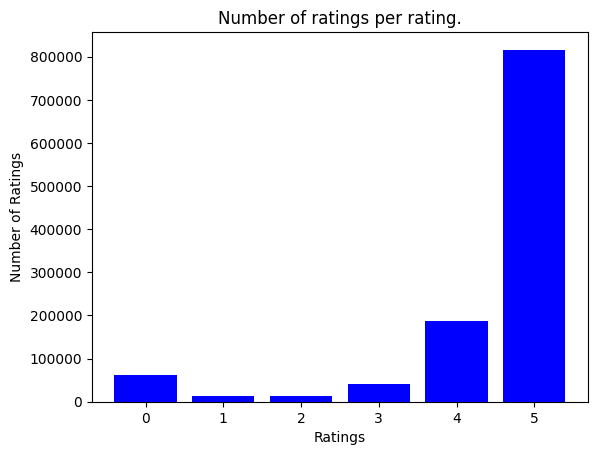

In [8]:
plt.bar(list(rating_counts.keys()), list(rating_counts.values()), color='blue')
plt.xlabel('Ratings')
plt.ylabel('Number of Ratings')
plt.title('Number of ratings per rating.')
plt.show()

In [9]:
reviewsPerUser = defaultdict(list)
numReviewsPerUser = defaultdict(int)
reviewsPerRecipe = defaultdict(list)
numReviewsPerRecipe = defaultdict(int)
ratingsPerUser = defaultdict(list)
ratingsPerRecipe = defaultdict(list)
averageRatingPerUser = defaultdict(int)
averageRatingPerRecipe = defaultdict(int)
reviewsPerUserTrain = defaultdict(list)
reviewsPerRecipeTrain = defaultdict(list)
for d in dataset:
    reviewsPerUser[d['user_id']].append(d)
    numReviewsPerUser[d['user_id']] += 1
    reviewsPerRecipe[d['recipe_id']].append(d)
    numReviewsPerRecipe[d['recipe_id']] += 1
    ratingsPerUser[d['user_id']].append(int(d['rating']))
    ratingsPerRecipe[d['recipe_id']].append(int(d['rating']))
for user in ratingsPerUser:
    averageRatingPerUser[user] = sum(ratingsPerUser[user]) / len(ratingsPerUser)
for recipe in ratingsPerRecipe:
    averageRatingPerRecipe[recipe] = sum(ratingsPerRecipe[recipe]) / len(ratingsPerRecipe)

In [10]:
globalAverageRatingPerUser = sum(averageRatingPerUser.values()) / len(averageRatingPerUser)
globalAverageRatingPerRecipe = sum(averageRatingPerRecipe.values()) / len(averageRatingPerRecipe)

In [11]:
averageReviewsPerUser = sum(numReviewsPerUser.values()) / len(numReviewsPerUser)
averageReviewsPerUser

4.997868208500684

In [12]:
averageReviewsPerRecipe = sum(numReviewsPerRecipe.values()) / len(numReviewsPerRecipe)
averageReviewsPerRecipe

4.888541122532238

In [13]:
recipesPerMonth = defaultdict(list)
numRecipesPerMonth = defaultdict(int)
for d in dataset:
    dateString = d['date']
    recipeString = d['recipe_id']
    temp = datetime.strptime(dateString, '%Y-%m-%d')
    month = temp.month
    recipesPerMonth[month].append(recipeString)
    numRecipesPerMonth[month] += 1
numRecipesPerMonth = dict(sorted(numRecipesPerMonth.items()))
numRecipesPerMonth


{1: 109814,
 2: 92331,
 3: 98245,
 4: 93883,
 5: 89504,
 6: 97027,
 7: 91356,
 8: 88766,
 9: 89063,
 10: 95018,
 11: 91801,
 12: 95559}

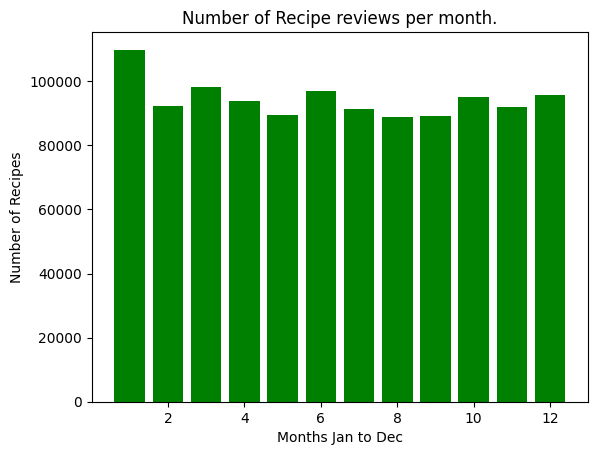

In [14]:
plt.bar(list(numRecipesPerMonth.keys()), list(numRecipesPerMonth.values()), color='green')
plt.xlabel('Months Jan to Dec')
plt.ylabel('Number of Recipes')
plt.title('Number of Recipe reviews per month.')
plt.show()

In [15]:
lengths = [len(d['review']) for d in dataset]
ratings = [d['rating'] for d in dataset]
ratings = sorted(ratings)

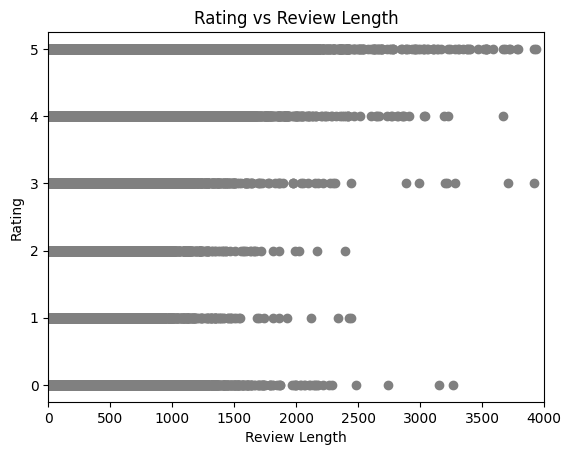

In [16]:
plt.scatter(lengths, ratings, color='grey')
plt.xlim(0, 4000)
plt.xlabel('Review Length')
plt.ylabel('Rating')
plt.title('Rating vs Review Length')
plt.show()

In [17]:
#Part 2

In [18]:
ratings = [d['rating'] for d in dataset] #the output we want to predict
text = [len(d['review']) for d in dataset] #the feature used for prediction
max_length = max(text)

In [19]:
dataValid = dataset[int(len(dataset) * 0.50):int(len(dataset) * 0.75)]

In [20]:
correct = []
for d in dataValid:
    if float(d['rating']) == 5:
        correct.append(1)
    else:
        correct.append(0)
sum(correct) / len(correct)

0.7202534864990886

In [21]:
dataTrain = dataset[:int(len(dataset) * 0.50)]

In [22]:
dataTest = dataset[int(len(dataset) * 0.75):]

In [23]:
XTrain = [[1, len(d['review']) / max_length] for d in dataTrain]
yTrain = [int(d['rating']) for d in dataTrain]
XValid = [[1, len(d['review']) / max_length] for d in dataValid]
yValid = [int(d['rating']) for d in dataValid]
XTest = [[1, len(d['review']) / max_length] for d in dataTest]
yTest = [int(d['rating']) for d in dataTest]



In [24]:
mod = linear_model.LinearRegression(fit_intercept=False)
mod.fit(XTrain, yTrain)

LinearRegression(fit_intercept=False)

In [25]:
y_pred = mod.predict(XValid)

In [26]:
sse = 0
for x, y in zip(yValid, y_pred):
    sse += (x-y)**2
mse = sse / len(yValid)
print(mse)
correct = []
for yP, yV in zip(y_pred, yValid):
    if math.ceil(yP) == yV:
        correct.append(1)
    else:
        correct.append(0)
sum(correct) / len(correct)

1.62315356550237


0.7202534864990886

In [27]:
def feature(datum):
    feat = [0] * 3
    feat[0] = 1
    feat[1] = len(datum['review']) / max_length
    if datum['recipe_id'] in numReviewsPerRecipe:
        feat[2] = numReviewsPerRecipe[d['recipe_id']]
    else:
        feat[2] = averageReviewsPerRecipe
    return feat


In [28]:
XTrain2 = [feature(d) for d in dataTrain]
yTrain2 = yTrain
XValid2 = [feature(d) for d in dataValid]


In [29]:
model = linear_model.LinearRegression(fit_intercept=False)
model.fit(XTrain2, yTrain2)

LinearRegression(fit_intercept=False)

In [30]:
y_pred2 = model.predict(XValid2)

In [31]:
sse = 0
for x, y in zip(yValid, y_pred2):
    sse += (x-y)**2
mse2 = sse / len(yValid)
print(mse2)
correct = []
for yP, yV in zip(y_pred2, yValid):
    if math.ceil(yP) == yV:
        correct.append(1)
    else:
        correct.append(0)
sum(correct) / len(correct)

1.6231614754043284


0.7202534864990886

In [32]:
def feature2(datum):
    feat = [0] * 4
    feat[0] = 1
    feat[1] = len(datum['review']) / max_length
    if datum['recipe_id'] in numReviewsPerRecipe:
        feat[2] = numReviewsPerRecipe[d['recipe_id']]
    else:
        feat[2] = averageReviewsPerRecipe
    if datum['user_id'] in numReviewsPerUser:
        feat[3] = numReviewsPerUser[d['user_id']]
    else:
        feat[3] = averageReviewsPerUser
    return feat


In [33]:
XTrain3 = [feature2(d) for d in dataTrain]
yTrain3 = yTrain
XValid3 = [feature2(d) for d in dataValid]


In [34]:
model = linear_model.LinearRegression(fit_intercept=False)
model.fit(XTrain3, yTrain3)

LinearRegression(fit_intercept=False)

In [35]:
y_pred3 = model.predict(XValid3)

In [36]:
sse = 0
for x, y in zip(yValid, y_pred3):
    sse += (x-y)**2
mse3 = sse / len(yValid)
print(mse3)
correct = []
for yP, yV in zip(y_pred3, yValid):
    if math.ceil(yP) == yV:
        correct.append(1)
    else:
        correct.append(0)
sum(correct) / len(correct)

1.6231614802857237


0.7202534864990886

In [37]:
def feature3(datum):
    feat = [0] * 4
    feat[0] = 1
    feat[1] = len(datum['review']) / max_length
    if datum['user_id'] in averageRatingPerUser:
        feat[2] = averageRatingPerUser[datum['user_id']]
    else:
        feat[2] = globalAverageRatingPerUser
    if datum['recipe_id'] in averageRatingPerUser:
        feat[3] = averageRatingPerRecipe[datum['recipe_id']]
    else:
        feat[3] = globalAverageRatingPerRecipe
    return feat


In [38]:
XTrain4 = [feature3(d) for d in dataTrain]
yTrain4 = yTrain
XValid4 = [feature3(d) for d in dataValid]


In [39]:
model4 = linear_model.LinearRegression(fit_intercept=False)
model4.fit(XTrain4, yTrain4)
y_pred4 = model4.predict(XValid4)

In [40]:
sse = 0
for x, y in zip(yValid, y_pred4):
    sse += (x-y)**2
mse4 = sse / len(yValid)
print(mse4)
correct = []
for yP, yV in zip(y_pred4, yValid):
    if math.ceil(yP) == yV:
        correct.append(1)
    else:
        correct.append(0)
sum(correct) / len(correct)

1.6007815409858128


0.7084869936275133

In [41]:
def feature4(datum):
    feat = [0] * 4
    feat[0] = 1
    feat[1] = len(datum['review']) / max_length
    if datum['user_id'] in averageRatingPerUser:
        feat[2] = averageRatingPerUser[datum['user_id']] > 4
    else:
        feat[2] = 0
    if datum['recipe_id'] in averageRatingPerUser:
        feat[3] = averageRatingPerRecipe[datum['recipe_id']] > 4
    else:
        feat[3] = 0
    return feat


In [42]:
XTrain5 = [feature4(d) for d in dataTrain]
yTrain5 = yTrain
XValid5 = [feature4(d) for d in dataValid]


In [43]:
model5 = linear_model.LinearRegression(fit_intercept=False)
model5.fit(XTrain5, yTrain5)
y_pred5 = model5.predict(XValid5)

In [44]:
sse = 0
for x, y in zip(yValid, y_pred5):
    sse += (x-y)**2
mse5 = sse / len(yValid)
print(mse5)
correct = []
for yP, yV in zip(y_pred5, yValid):
    if math.ceil(yP) == yV:
        correct.append(1)
    else:
        correct.append(0)
sum(correct) / len(correct)

1.62315356550237


0.7202534864990886

In [45]:
recipeDataset = []
with open('../assignment2data/archive/RAW_recipes.csv', 'r') as file:
    reader = csv.DictReader(file)
    for line in reader:
        recipeDataset.append(line)
print(len(recipeDataset))

231637


In [46]:
recipeDataset[0]

{'name': 'arriba   baked winter squash mexican style',
 'id': '137739',
 'minutes': '55',
 'contributor_id': '47892',
 'submitted': '2005-09-16',
 'tags': "['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']",
 'nutrition': '[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]',
 'n_steps': '11',
 'steps': "['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce th

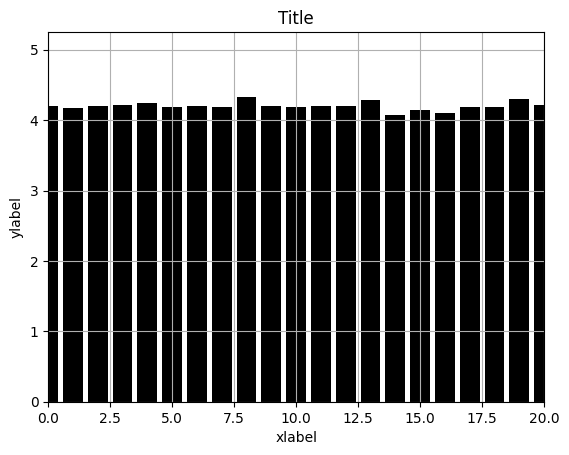

9.7654994668382
9.051153313158087
9398.546009488984
4.178696956708102
4.2152962937759435
69990
161647
127


In [47]:
recipeDict = {}
stepsPerRecipe = {}
ingredientsPerRecipe = {}
minutesPerRecipe = {}
recipesLessThanOneHour = []
recipesMoreThanOneHour = []
recipeStepsVsRating = defaultdict(list)
avgRatingForNumberOfRecipeSteps = {}
for r in recipeDataset:
    recipeDict[r['id']] = r
for r in recipeDataset:
    stepsPerRecipe[r['id']] = int(r['n_steps'])
    ingredientsPerRecipe[r['id']] = int(r['n_ingredients'])
    minutesPerRecipe[r['id']] = int(r['minutes'])
for r in recipeDataset:
    if '60-minutes-or-less' in r['tags']:
        recipesLessThanOneHour.append((r['id'], int(recipeToDataset[r['id']]['rating'])))
    else:
        recipesMoreThanOneHour.append((r['id'], int(recipeToDataset[r['id']]['rating'])))
    recipeStepsVsRating[r['n_steps']].append(int(recipeToDataset[r['id']]['rating']))
for steps in recipeStepsVsRating:
    avgRatingForNumberOfRecipeSteps[int(steps)] = sum(recipeStepsVsRating[steps]) / len(recipeStepsVsRating[steps])
xVals = sorted(list(avgRatingForNumberOfRecipeSteps.keys()))
plt.bar(xVals, list(avgRatingForNumberOfRecipeSteps.values()), color='black')
plt.title('Title')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.xlim(0, 20)
plt.grid(True)
plt.show()

    
averageNumStepsPerRecipe = sum(stepsPerRecipe.values()) / len(stepsPerRecipe)
print(averageNumStepsPerRecipe)

averageNumIngredientsPerRecipe = sum(ingredientsPerRecipe.values()) / len(ingredientsPerRecipe)
print(averageNumIngredientsPerRecipe)

averageMinutesPerRecipe = sum(minutesPerRecipe.values()) / len(minutesPerRecipe)

print(averageMinutesPerRecipe)

total = 0
for recipe, rating in recipesLessThanOneHour:
    total += rating
averageRatingPerRecipeLessThanOneHour = total / len(recipesLessThanOneHour)
print(averageRatingPerRecipeLessThanOneHour)

total = 0
for recipe, rating in recipesMoreThanOneHour:
    total += rating
averageRatingPerRecipeMoreThanOneHour = total / len(recipesMoreThanOneHour)
print(averageRatingPerRecipeMoreThanOneHour)

print(len(recipesLessThanOneHour))
print(len(recipesMoreThanOneHour))
minutesPerRecipeList = list(minutesPerRecipe.values())
# Calculate the z-scores
z_scores = (minutesPerRecipeList - numpy.mean(minutesPerRecipeList)) / numpy.std(minutesPerRecipeList)

# Remove any values that are more than 3 standard deviations away from the mean
outliers = numpy.where(z_scores > 3)
minutesPerRecipeList = numpy.delete(minutesPerRecipeList, outliers)
print(statistics.mean(minutesPerRecipeList))


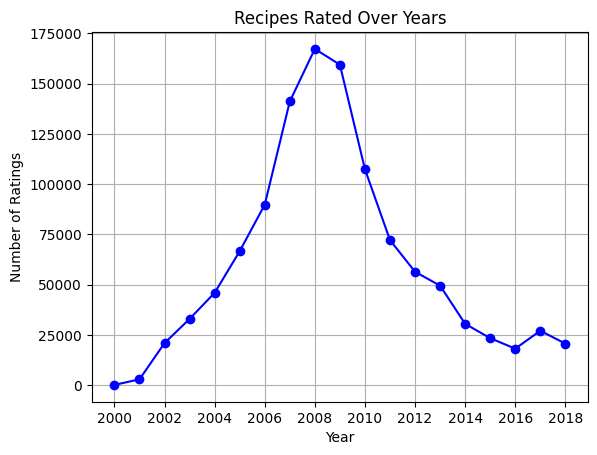

In [48]:
recipesPerYear = defaultdict(list)
numRecipesPerYear = defaultdict(int)
for d in dataset:
    dateString = d['date']
    recipeString = d['recipe_id']
    temp = datetime.strptime(dateString, '%Y-%m-%d')
    year = temp.year
    recipesPerYear[year].append(recipeString)
    numRecipesPerYear[year] += 1
numRecipesPerYear = dict(sorted(numRecipesPerYear.items()))
numRecipesPerYear

years = list(numRecipesPerYear.keys())
values = list(numRecipesPerYear.values())
plt.plot(years, values, marker='o', linestyle='-', color='b')
plt.title('Recipes Rated Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.grid(True)
plt.xticks([int(year) for year in years][::2])
plt.show()

In [49]:
recipeDataset[0]

{'name': 'arriba   baked winter squash mexican style',
 'id': '137739',
 'minutes': '55',
 'contributor_id': '47892',
 'submitted': '2005-09-16',
 'tags': "['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']",
 'nutrition': '[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]',
 'n_steps': '11',
 'steps': "['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce th

In [50]:
def feature5(datum):
    feat = [0] * 2
    recipeID = datum['recipe_id']
    feat[0] = 1
    feat[1] = int(recipeDict[recipeID]['n_steps'])
    
    return feat


In [51]:
XTrain6 = [feature5(d) for d in dataTrain]
yTrain6 = yTrain
XValid6 = [feature5(d) for d in dataValid]


In [52]:
model6 = linear_model.LinearRegression(fit_intercept=False)
model6.fit(XTrain6, yTrain6)
y_pred6 = model6.predict(XValid6)

In [53]:
sse = 0
for x, y in zip(yValid, y_pred6):
    sse += (x-y)**2
mse6 = sse / len(yValid)
print(mse6)
correct = []
for yP, yV in zip(y_pred6, yValid):
    if math.ceil(yP) == yV:
        correct.append(1)
    else:
        correct.append(0)
sum(correct) / len(correct)

1.622813309986054


0.7202464216579769

In [54]:
def feature6(datum):
    feat = [0] * 4
    recipeID = datum['recipe_id']
    feat[0] = 1
    feat[1] = int(recipeDict[recipeID]['n_steps'])
    feat[2] = int(recipeDict[recipeID]['minutes'])
    feat[3] = int(recipeDict[recipeID]['n_ingredients'])
    
    return feat


In [55]:
XTrain7 = [feature6(d) for d in dataTrain]
yTrain7 = yTrain
XValid7 = [feature6(d) for d in dataValid]


In [56]:
model7 = linear_model.LinearRegression(fit_intercept=False)
model7.fit(XTrain7, yTrain7)
y_pred7 = model7.predict(XValid7)

In [57]:
sse = 0
for x, y in zip(yValid, y_pred7):
    sse += (x-y)**2
mse7 = sse / len(yValid)
print(mse7)
correct = []
for yP, yV in zip(y_pred7, yValid):
    if math.ceil(yP) == yV:
        correct.append(1)
    else:
        correct.append(0)
sum(correct) / len(correct)

1.6227943012588306


0.7202464216579769

In [58]:
betaU = {}
betaI = {}
def resetBetas():
    for u in ratingsPerUser:
        betaU[u] = 0
    for i in ratingsPerRecipe:
        betaI[i] = 0

In [59]:
dataTrain[0]
globalRatingAverage = sum(int(d['rating']) for d in dataTrain) / len(dataTrain)
alpha = globalRatingAverage

In [60]:
for d in dataTrain:
    reviewsPerUserTrain[d['user_id']].append(d)
    reviewsPerRecipeTrain[d['recipe_id']].append(d)

In [61]:
dataTrain[0]

{'user_id': '38094',
 'recipe_id': '40893',
 'date': '2003-02-17',
 'rating': '4',
 'review': 'Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt.  Used low fat sour cream.  Thanks.'}

In [62]:
def iterate(lamb, N):
    resetBetas()
    for iter in range(N):
        numerAlpha = 0
        for d in dataTrain:
            numerAlpha += (int(d['rating']) - (betaU[d['user_id']] + betaI[d['recipe_id']]))
        alpha = numerAlpha / len(dataTrain)

        for u in reviewsPerUser:
            numerU = 0
            for review in reviewsPerUser[u]:
                numerU += (int(review['rating']) - (alpha + betaI[review['recipe_id']]))
            betaU[u] = numerU / (lamb + len(ratingsPerUser[u]))
        
        for g in ratingsPerRecipe:
            numerI = 0
            for review in reviewsPerRecipe[g]:
                numerI += (int(review['rating']) - (alpha + betaU[review['user_id']]))
            betaI[g] = numerI / (lamb + len(ratingsPerRecipe[g]))
    return alpha

In [63]:

def MSE(y, ypred):
    diff = [(x-y)**2 for x, y in zip(y, ypred)]
    return sum(diff) / len(diff)
    
def prediction(u, g, alpha):
    if u in betaU and g in betaI:
        return alpha + betaU[u] + betaI[g]
    else:
        return globalRatingAverage

In [65]:
alpha = iterate(0, 25)
print(alpha)
hoursValidOnly = [int(r['rating']) for r in dataTest]
predictions = [prediction(d['user_id'], d['recipe_id'], alpha) for d in dataTest]

validMSE = MSE(hoursValidOnly, predictions)
validMSE

4.41325994121741


0.49516317558887524

In [161]:
alpha = iterate(0, 25)
print(alpha)
hoursValidOnly = [int(r['rating']) for r in dataValid]
predictions = [prediction(d['user_id'], d['recipe_id'], alpha) for d in dataValid]

validMSE = MSE(hoursValidOnly, predictions)
validMSE

4.4138912001559625


0.5083405452244915

In [89]:
wordCount = defaultdict(int)
punctuation = set(string.punctuation)
stemmer = PorterStemmer()
for d in dataTrain:
    r = ''.join([c for c in d['review'].lower() if not c in punctuation])
    for w in r.split():
        w = stemmer.stem(w)
        wordCount[w] += 1
len(wordCount)

179292

In [91]:
counts = [(wordCount[w], w) for w in wordCount]
counts.sort()
counts.reverse()
words = [x[1] for x in counts[:1000]]

In [92]:
wordId = dict(zip(words, range(len(words))))
wordSet = set(words)

In [94]:
def feature8(datum):
    feat = [0]*len(words)
    r = ''.join([c for c in datum['review'].lower() if not c in punctuation])
    for w in r.split():
        if w in words:
            feat[wordId[w]] += 1
    feat.append(1) # offset
    return feat

In [95]:
XTrain8 = [feature8(d) for d in dataTrain]
yTrain8 = yTrain
XValid8 = [feature8(d) for d in dataValid]

In [96]:
clf = linear_model.Ridge(1.0, fit_intercept=False) # MSE + 1.0 l2
clf.fit(XTrain8, yTrain8)
y_pred8 = clf.predict(XValid8)

In [97]:
sse = 0
for x, y in zip(yValid, y_pred8):
    sse += (x-y)**2
mse8 = sse / len(yValid)
print(mse8)
correct = []
for yP, yV in zip(y_pred8, yValid):
    if math.ceil(yP) == yV:
        correct.append(1)
    else:
        correct.append(0)
sum(correct) / len(correct)

1.4284947613629222


0.6449952665564551